In [123]:
import os
import pandas as pd
from sqlalchemy import create_engine
from getpass import getpass
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connection parameters to PostgreSQL
DB_USER = "postgres"         
DB_PASSWORD = getpass()
DB_HOST = "localhost"         
DB_PORT = "5432"             
DB_NAME = "ecommerce"         

# Create connection
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

 ········


# Discover customers' data

### Overall review

In [3]:
pd.read_sql('''
SELECT *
FROM customers
limit 10
''', engine)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e-2fba-1a1f-bc88-172c00ba8bc7,861eff47-11a5-42e4-b938-43c6dd7febb0,14409,franca,SP
1,18955e83-d337-fd6b-2def-6b18a428ac77,290c77bc-529b-7ac9-35b9-3aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00-2885-86eb-d087-12fdd0374a03,060e732b-5b29-e818-1a18-229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027b-c5c5-109e-529d-4dc6358b12c3,259dac75-7896-d24d-7702-b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab1-71c8-0ec8-364f-7c12e35b23ad,345ecd01-c38d-18a9-036e-d96c73b8d066,13056,campinas,SP
5,879864da-b9bc-3047-522c-92c82e1212b8,4c937445-1666-7ad3-b8f1-fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7c-f631-60e5-36e0-908c76c3f441,addec96d-2e05-9c80-c30f-e6871d30d177,4534,sao paulo,SP
7,5e274e7a-0c38-09e1-4aba-7ad5aae0d407,57b2a98a-4098-12fe-9618-067b6b8ebe4f,35182,timoteo,MG
8,5adf08e3-4b2e-9939-82a4-7070956c5c65,1175e95f-b47d-dff9-de6b-2b06188f7e0d,81560,curitiba,PR
9,4b7139f3-4592-b3a3-1687-243a302fa75b,9afe194f-b833-f79e-300e-37e580171f22,30575,belo horizonte,MG


### Identifiers review

In [5]:
pd.read_sql('''
SELECT COUNT(*) AS row_cnt
, COUNT(DISTINCT customer_id) AS customer_id_cnt
, COUNT(DISTINCT customer_unique_id) AS customer_unique_id_cnt
FROM customers
''', engine)

,row_cnt,customer_id_cnt,customer_unique_id_cnt
0,99441,99441,96096


#### Why mismatch?
1. customer_id is a key to the orders table
2. customer_unique_id is an actual customer identifier

In [16]:
pd.read_sql('''
SELECT COUNT(*) AS row_cnt
, COUNT(DISTINCT customer_id) AS customer_id_cnt
, COUNT(DISTINCT customer_unique_id) AS customer_unique_id_cnt
FROM customers
WHERE customer_unique_id IS NULL
;
''', engine)

,row_cnt,customer_id_cnt,customer_unique_id_cnt
0,0,0,0


In [6]:
pd.read_sql('''
SELECT customer_unique_id
, COUNT(DISTINCT customer_id) AS customer_id_cnt
FROM customers
GROUP BY customer_unique_id
ORDER BY customer_id_cnt DESC
LIMIT 10;
''', engine)

,customer_unique_id,customer_id_cnt
0,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,17
1,3e43e610-5506-432c-953e-165fb2acf44c,9
2,ca77025e-7201-e3b3-0c44-b472ff346268,7
3,1b6c7548-a2a1-f903-7c1f-d3ddfed95f33,7
4,6469f99c-1f9d-fae7-733b-25662e7f1782,7
5,dc813062-e0fc-2340-9cd2-55f7f53c7074,6
6,63cfc61c-ee11-cbe3-06bf-f5857d00bfe4,6
7,12f5d6e1-cbf9-3daf-d9dc-c19095df0b3d,6
8,47c1a303-3b8b-77b3-ab6e-109eb4d5fdf3,6
9,de34b161-1759-4161-a6a8-9c50b289d35a,6


In [7]:
pd.read_sql('''
SELECT *
FROM customers
WHERE customer_unique_id = '8d50f5ea-df50-201c-cdce-dfb9e2ac8455'
;
''', engine)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1bd35854-7193-2167-ab72-a84955ebefea,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
1,a8fabc80-5e9a-10a3-c93a-e5bff642b86b,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
2,897b7f72-0427-14ef-aa64-ac306ba0cafc,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
3,b2b13de0-770e-06de-5008-0fea77c459e6,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
4,42dbc1ad-9d56-0637-c9c4-c1533746f86d,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
5,dfb941d6-f7b0-2f57-a44c-3b7c3fefb44b,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
6,65f9db9d-d07a-4e79-b625-effa4c868fcb,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
7,1c62b48f-b34e-e043-310d-cb233caabd2e,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
8,a682769c-4bc1-0fc6-ef21-01337a6c83c9,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP
9,6289b752-19d7-57a5-6c0c-ce8d9e427900,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,4045,sao paulo,SP


### Geographic fields review

In [8]:
pd.read_sql('''
SELECT COUNT(DISTINCT customer_zip_code_prefix) AS zip_code_cnt
, COUNT (DISTINCT customer_city) AS city_cnt
, COUNT (DISTINCT customer_state) AS state_cnt
FROM customers
;
''', engine)

,zip_code_cnt,city_cnt,state_cnt
0,14994,4119,27


##### Check that zip code <= city <= state

In [10]:
pd.read_sql('''
SELECT customer_zip_code_prefix
, COUNT (DISTINCT customer_city) AS city_cnt
FROM customers
GROUP BY customer_zip_code_prefix
ORDER BY customer_zip_code_prefix DESC
LIMIT 5
;
''', engine)

,customer_zip_code_prefix,city_cnt
0,99990,1
1,99980,1
2,99970,1
3,99965,1
4,99960,1


In [13]:
pd.read_sql('''
SELECT customer_city
, COUNT (DISTINCT customer_state) AS state_cnt
FROM customers
GROUP BY customer_city
ORDER BY state_cnt DESC
LIMIT 5
;
''', engine)

,customer_city,state_cnt
0,planalto,4
1,santa maria,4
2,boa esperanca,4
3,bonito,4
4,sao domingos,4


In [15]:
pd.read_sql('''
SELECT *
FROM customers
WHERE customer_city = 'planalto'
;
''', engine)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,29094bc1-b317-56d5-84d3-c3bb60e5db45,561c3fe2-41a8-6774-f076-4fd533bbf102,98470,planalto,RS
1,fff55ba8-dffa-552b-6fdf-d86c2e806459,d841aa88-1153-65f9-0652-48b6e49aaa2c,98470,planalto,RS
2,8a17fed2-c873-a4cd-b70a-2110ff34bb77,7b577b8b-eeca-5c17-d885-11a4c0cf6152,98470,planalto,RS
3,6ba47b28-c843-67f0-c277-69d78f1c3adb,8bba2fac-2cb3-8bfb-0a32-3272f63d5f75,85750,planalto,PR
4,3be8b07b-476c-f5a8-705f-9258a217f936,26cc8c49-362e-4478-de16-5274e7ccb214,85750,planalto,PR
5,86647fca-cfe0-17b6-3403-169c2369b7b9,3b28f005-4114-806f-3762-1c311da2dfdd,85750,planalto,PR
6,a453da7d-729e-434b-71f6-d69009f3fcf9,286c4f2a-3f0d-51fd-ee31-63927498cb6b,15260,planalto,SP
7,d34dfd38-d5a0-9cfd-e6f5-12ed4ecb9600,bf853c7f-7942-ead7-5f81-18b917ff0a76,45190,planalto,BA
8,9af0bb20-38a8-d6c1-064c-0f36b1505161,18d1c8b8-b4fd-7ace-56db-7dbb537c0ea2,85750,planalto,PR


##### There are really several Planoalto cities in Brazil in states Bahia, Rio Grande do Sul, Estado de Parana, Sao Paolo

# Discover sellers' data

In [17]:
pd.read_sql('''
SELECT *
FROM sellers
limit 10
''', engine)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f895-9a84-dea7-ee19-7c632cb2df15,13023,campinas,SP
1,d1b65fc7-debc-3361-ea86-b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de-9601-02d0-677a-81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2-e145-55b6-faee-a3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a-6bdc-b23d-eccc-82b0b80742cf,12914,braganca paulista,SP
5,c240c406-1717-ac18-06ae-6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3-edfa-46d2-27d5-121a6b6e4d37,55325,brejao,PE
7,1b938a7e-c6ac-5061-a66a-3766e0e75f90,16304,penapolis,SP
8,768a86e3-6ad6-aae3-d03e-e3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5-f32a-6ab2-b706-6a4130f114e3,80310,curitiba,PR


### Identifiers review

In [18]:
pd.read_sql('''
SELECT COUNT(*) AS row_cnt
, COUNT(DISTINCT seller_id) AS seller_id_cnt
FROM sellers
''', engine)

,row_cnt,seller_id_cnt
0,3095,3095


### Geographic data review

In [19]:
pd.read_sql('''
SELECT seller_zip_code_prefix
, COUNT (DISTINCT seller_city) AS city_cnt
FROM sellers
GROUP BY seller_zip_code_prefix
ORDER BY seller_zip_code_prefix DESC
LIMIT 5
;
''', engine)

,seller_zip_code_prefix,city_cnt
0,99730,1
1,99700,1
2,99670,1
3,99500,1
4,99300,1


# Orders data discovery

In [20]:
pd.read_sql('''
SELECT *
FROM orders
limit 10
''', engine)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51c-bdc5-4678-b7cc-49136f2d6af7,9ef432eb-6251-2973-04e7-6186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc-8bc7-dce0-b674-1e2150273451,b0830fb4-747a-6c6d-20de-a0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9-100c-2d0c-4494-6d9cf07ec65d,41ce2a54-c0b0-3bf3-443c-3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44-dbf5-de91-8fe9-c16f97b45f8a,f8819746-5ea7-920a-dcdb-ec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c-0840-e6cb-83a9-ceb5573f8159,8ab97904-e6da-ea88-66db-dbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c26-5e18-cb1d-cee5-2889e2d8acc3,503740e9-ca75-1ccd-da7b-a28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7f-aa42-fdb2-cefd-53fdc79a6098,ed0271e0-b7da-060a-3937-96590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad-8028-c9f2-cc23-74ded245783f,9bdf08b4-b3b5-2b55-26ff-42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866-2893-21a7-c93b-82b54852dc33,f54a9f0e-6b35-1c43-1402-b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5e-b88e-0ed6-a785-585b27e16dbf,31ad1d1b-63eb-9962-463f-764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


### Identifiers review

In [22]:
pd.read_sql('''
SELECT COUNT (*) AS row_cnt
, COUNT (DISTINCT order_id) AS order_id_cnt
, COUNT (DISTINCT customer_id) AS customer_id_cnt
FROM orders
''', engine)

,row_cnt,order_id_cnt,customer_id_cnt
0,99441,99441,99441


### Order status and timestamps review

In [35]:
pd.read_sql('''
SELECT order_status
, COUNT (*) as orders_cnt
FROM orders
GROUP BY order_status
ORDER BY orders_cnt DESC
;
''', engine)

,order_status,orders_cnt
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


### What about NULLs in timestamp fields?

In [24]:
pd.read_sql('''
SELECT DISTINCT order_status
FROM orders
WHERE order_purchase_timestamp IS NULL
;
''', engine)

,order_status


In [25]:
pd.read_sql('''
SELECT DISTINCT order_status
FROM orders
WHERE order_approved_at IS NULL
;
''', engine)

,order_status
0,canceled
1,created
2,delivered


In [26]:
pd.read_sql('''
SELECT *
FROM orders
WHERE order_approved_at IS NULL
AND order_status = 'delivered'
;
''', engine)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e04abd81-49ef-81b9-5221-e88f6ed9ab6a,2127dc66-03ac-3354-4953-ef05ec155771,delivered,2017-02-18 14:40:00,None,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
1,8a9adc69-528e-1001-fc68-dd0aaebbb54a,4c1ccc74-e009-9373-3742-a3c786dc3c1f,delivered,2017-02-18 12:45:31,None,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
2,7013bcfc-1c97-fe71-9a7b-5e05e61c12db,2941af76-d381-00e0-f874-0a374f1a5dc3,delivered,2017-02-18 13:29:47,None,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
3,5cf925b1-1642-1afa-85ee-25e99b4c34fb,29c35fc9-1fc1-3fb5-073c-8f30505d860d,delivered,2017-02-18 16:48:35,None,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
4,12a95a3c-06db-aec8-4bcf-b0e2da5d228a,1e101e0d-affa-ddce-8159-d25a8e53f2b2,delivered,2017-02-17 13:05:55,None,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
5,c1d4211b-3dae-7614-4dec-cd6c74144a88,684cb238-dc5b-5d63-6624-4e0e0776b450,delivered,2017-01-19 12:48:08,None,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
6,d69e5d35-6402-adc8-cf17-e08b5033acfb,68d08175-3ad4-fe22-fc4d-410a9eb1ca01,delivered,2017-02-19 01:28:47,None,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
7,d77031d6-a3c8-a52f-0197-64e68f211c69,0bf35cac-6cc7-3270-65da-879e2d90fae8,delivered,2017-02-18 11:04:19,None,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
8,7002a78c-79c5-19ac-5402-2d4f8a65e6e8,d5de688c-3210-96d1-5508-faae67a27051,delivered,2017-01-19 22:26:59,None,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
9,2eecb0d8-5f28-1280-f79f-a00f9cec1a95,a3d3c38e-58b9-d2df-b920-7cab690b6310,delivered,2017-02-17 17:21:55,None,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


### Some buggy days? <span style="color:red">14 orders</span> delivered without approval

In [27]:
pd.read_sql('''
SELECT DISTINCT order_purchase_timestamp::date as purchase_date
FROM orders
WHERE order_approved_at IS NULL
AND order_status = 'delivered'
;
''', engine)

,purchase_date
0,2017-01-19
1,2017-02-17
2,2017-02-18
3,2017-02-19


In [28]:
pd.read_sql('''
SELECT DISTINCT order_status
FROM orders
WHERE order_delivered_carrier_date IS NULL
;
''', engine)

,order_status
0,unavailable
1,invoiced
2,created
3,approved
4,delivered
5,processing
6,canceled


In [29]:
pd.read_sql('''
SELECT DISTINCT order_status
FROM orders
WHERE order_delivered_customer_date IS NULL
;
''', engine)

,order_status
0,shipped
1,unavailable
2,invoiced
3,created
4,approved
5,delivered
6,processing
7,canceled


In [33]:
pd.read_sql('''
SELECT *
FROM orders
WHERE order_delivered_customer_date IS NULL
AND order_status = 'delivered'
LIMIT 10
;
''', engine)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2d1e2d5b-f4dc-7227-b3bf-ebb81328c15f,ec05a6d8-558c-6455-f0cb-bd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,None,2017-12-18
1,f5dd62b7-8804-9ad9-fc05-26e3ad11a097,5e89028e-024b-381d-c84a-13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,None,2018-07-16
2,2ebdfc4f-15f2-3b91-474e-df87475f108e,29f05402-3170-2fda-0cfd-ee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,None,2018-07-30
3,e69f75a7-17d6-4fc5-ecdf-ae42b2e8e086,cfda40ca-8dd0-a5d4-86a9-635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,None,2018-07-30
4,0d3268ba-d9b0-86af-7677-85e3f0fc0133,4f1d63d3-5fb7-c899-9853-b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,None,2018-07-24
5,2d858f45-1373-b04f-b5c9-84a1cc2defaf,e08caf66-8d49-9a6d-643d-afd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,None,2017-06-23
6,ab7c89dc-1bf4-a1ea-d9d6-ec1ec8968a84,dd1b84a7-286e-b452-4d52-af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,None,2018-06-26
7,20edc82c-f540-0ce9-5e1a-facc25798b31,28c37425-f112-7d88-7d73-37f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,None,2018-07-19


### <span style="color:red">8 orders</span> delivered without delivery date

In [34]:
pd.read_sql('''
SELECT DISTINCT order_status
FROM orders
WHERE order_estimated_delivery_date IS NULL
;
''', engine)

,order_status


In [66]:
delays = pd.read_sql('''
SELECT order_id
, order_delivered_customer_date::date - order_estimated_delivery_date::date AS delay_days
, order_delivered_customer_date
, order_estimated_delivery_date
FROM orders
WHERE order_delivered_customer_date IS NOT NULL
ORDER BY delay_days
''', engine)

delays.head()

,order_id,delay_days,order_delivered_customer_date,order_estimated_delivery_date
0,0607f0ef-ea4b-566f-1eb8-f7d3c2397320,-147,2018-03-09 23:36:47,2018-08-03
1,c72727d2-9cde-4cf8-70d5-69bf65edabfd,-140,2017-02-14 14:27:45,2017-07-04
2,eec7f369-423b-033e-549c-02f3c5381205,-135,2018-02-27 16:35:43,2018-07-12
3,c2bb89b5-c1dd-978d-5072-84be78a04cb2,-124,2017-06-09 13:35:54,2017-10-11
4,40dc2ba6-f322-a176-26aa-c6244332828c,-109,2017-10-13 13:49:07,2018-01-30


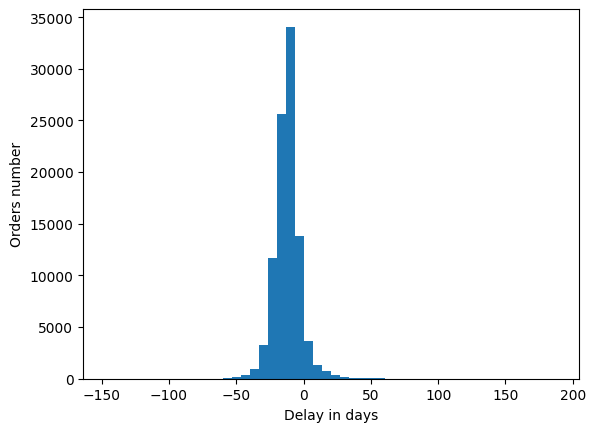

In [69]:
plt.hist(delays['delay_days'], bins = 50)
plt.xlabel('Delay in days')
plt.ylabel('Orders number')
plt.show()

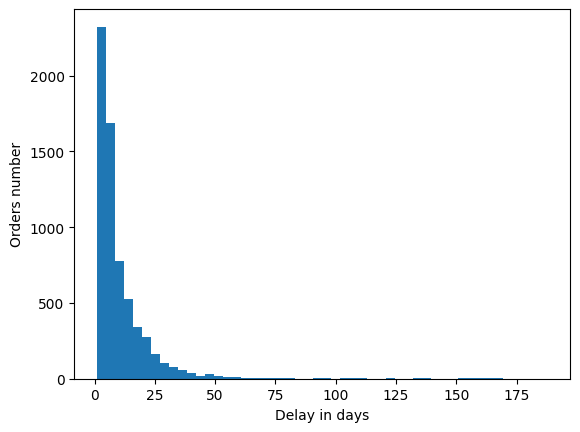

In [70]:
plt.hist(delays['delay_days'][delays.delay_days > 0], bins = 50)
plt.xlabel('Delay in days')
plt.ylabel('Orders number')
plt.show()

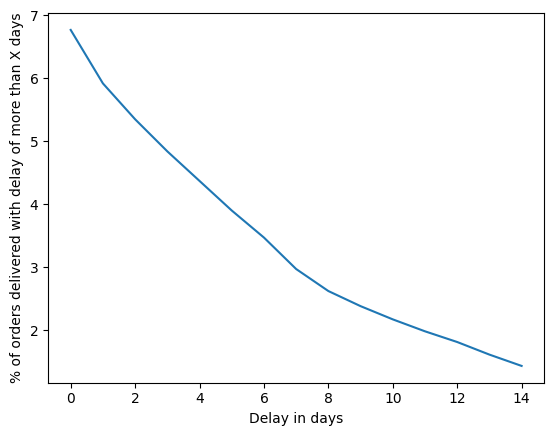

In [79]:
# Rate of orders delivered with delay more than X days
rates = []
for x in range(15):
    rates.append(round(delays[delays.delay_days > x].shape[0] / delays.shape[0]*100, 2))
plt.plot(rates)
plt.xlabel('Delay in days')
plt.ylabel('% of orders delivered with delay of more than X days')
plt.show()

In [75]:
# Rate of orders delivered with delay more than 2 days
print(f"Rate of orders delivered with delay more than 2 days: {round(delays[delays.delay_days > 2].shape[0] / delays.shape[0]*100, 2)}%")

Rate of orders delivered with delay more than 2 days: 5.35%


In [ ]:
# Rate of orders delivered with delay more than 2 days
print(f"Rate of orders delivered with delay more than 2 days: {round(delays[delays.delay_days > 2].shape[0] / delays.shape[0]*100, 2)}%")

# Discover order items data

In [37]:
pd.read_sql('''
SELECT *
FROM order_items
LIMIT 5
;
''', engine)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242-fe8c-5a6d-1ba2-dd792cb16214,1,4244733e-06e7-ecb4-970a-6e2683c13e61,48436dad-e18a-c8b2-bce0-89ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77-f2f0-320c-5571-90d7a144bdd3,1,e5f2d52b-8021-89ee-6588-65ca93d83a8f,dd7ddc04-e1b6-c2c6-1435-2b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec-3982-24ef-6ca0-657da4fc703e,1,c777355d-18b7-2b67-abbe-ef9df44fd0fd,5b51032e-ddd2-42ad-c84c-38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acb-cdf0-a6da-a1e9-31b038114c75,1,7634da15-2a46-10f1-595e-fa32f14722fc,9d7a1d34-a505-2409-0064-25275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26-cf59-d7ce-69df-abb4e55b4fd9,1,ac6c3623-068f-30de-0304-5865e4e10089,df560393-f3a5-1e74-553a-b94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [38]:
pd.read_sql('''
SELECT COUNT (*) AS rows_cnt
, COUNT (DISTINCT order_id) AS order_id_cnt
, COUNT (DISTINCT product_id) AS product_id_cnt
, COUNT (DISTINCT seller_id) AS seller_id_cnt
FROM order_items
LIMIT 5
;
''', engine)

,rows_cnt,order_id_cnt,product_id_cnt,seller_id_cnt
0,112650,98666,32951,3095


In [41]:
pd.read_sql('''
SELECT COUNT (*) FILTER (WHERE order_id IS NULL) AS order_id_nulls_cnt
, COUNT (*) FILTER (WHERE product_id IS NULL) AS product_id_nulls_cnt
, COUNT (*) FILTER (WHERE seller_id IS NULL) AS seller_id_nulls_cnt
, COUNT (*) FILTER (WHERE shipping_limit_date IS NULL) AS ship_lim_date_nulls_cnt
, COUNT (*) FILTER (WHERE price IS NULL) AS price_nulls_cnt
, COUNT (*) FILTER (WHERE freight_value IS NULL) AS freight_nulls_cnt
FROM order_items
LIMIT 5
;
''', engine)

,order_id_nulls_cnt,product_id_nulls_cnt,seller_id_nulls_cnt,ship_lim_date_nulls_cnt,price_nulls_cnt,freight_nulls_cnt
0,0,0,0,0,0,0


# Discover product data

In [42]:
pd.read_sql('''
SELECT *
FROM products
LIMIT 5
;
''', engine)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef0-4dbc-ff45-41ed-26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa07113-9cb1-6b67-ca9e-5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec-8810-374e-d1b6-5e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcf-e190-66a9-32b7-673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de-2744-4484-9c21-9cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [44]:
pd.read_sql('''
SELECT COUNT (*) AS rows_cnt
, COUNT (DISTINCT product_id) AS product_id_cnt
FROM products
LIMIT 5
;
''', engine)

,rows_cnt,product_id_cnt
0,32951,32951


In [52]:
# Find all NULLs in the table
df = pd.read_sql('''
SELECT *
FROM products
''', engine)

null_mask = df.isnull().any(axis=1)

df[null_mask].head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c-76fa-b663-34f3-6de622ecbd3a,None,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c-2034-d6d0-7599-7acef1870e9b,None,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431-d72c-d51f-19eb-9f7dae4d1617,None,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281-eb6d-663c-ed74-8f324108c733,None,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f48-2620-cb67-2f5e-586bb132eae9,None,NaN,NaN,NaN,300.0,35.0,7.0,12.0


# Discover order_payments data

In [53]:
pd.read_sql('''
SELECT *
FROM order_payments
LIMIT 5
;
''', engine)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226-f3fe-1789-b1e8-b2acac839d17,1,credit_card,8,99.33
1,a9810da8-2917-af2d-9aef-d1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e-9339-6b6f-a0d3-dd708e76c1bd,1,credit_card,1,65.71
3,ba789979-21bb-cdc1-373b-b41e913ab953,1,credit_card,8,107.78
4,42fdf880-ba16-b47b-5925-1dd489d4441a,1,credit_card,2,128.45


In [55]:
pd.read_sql('''
SELECT COUNT (*) as rows_cnt
, COUNT (DISTINCT order_id) as order_id_cnt
FROM order_payments
LIMIT 5
;
''', engine)

,rows_cnt,order_id_cnt
0,103886,99440


In [54]:
df = pd.read_sql('''
SELECT *
FROM order_payments
''', engine)

null_mask = df.isnull().any(axis=1)

df[null_mask].head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [56]:
pd.read_sql('''
SELECT payment_type
, COUNT (*) as payments_cnt
FROM order_payments
GROUP BY payment_type
ORDER BY payments_cnt DESC
;
''', engine)

,payment_type,payments_cnt
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [57]:
pd.read_sql('''
WITH temp AS 
(SELECT order_id, COUNT (*) as payments_cnt
FROM order_payments
GROUP BY order_id
)
SELECT p.*, t.payments_cnt
FROM order_payments p
JOIN temp t
ON t.order_id = p.order_id
WHERE t.payments_cnt > 1
ORDER BY payments_cnt, order_id DESC
LIMIT 10;
''', engine)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,payments_cnt
0,ffc730a0-615d-28ec-19f9-cad02cb41442,2,credit_card,1,12.63,2
1,ffc730a0-615d-28ec-19f9-cad02cb41442,1,credit_card,1,14.76,2
2,ffa39020-fe7c-8a3e-9073-20e1bec4b985,1,credit_card,1,7.13,2
3,ffa39020-fe7c-8a3e-9073-20e1bec4b985,2,voucher,1,64.01,2
4,ffa1dd97-810d-e91a-03ab-d7bd76d2fed1,2,voucher,1,418.73,2
5,ffa1dd97-810d-e91a-03ab-d7bd76d2fed1,1,credit_card,1,36.58,2
6,ff7400d9-0416-1b62-b6e8-30b3988f5cbd,1,credit_card,1,54.96,2
7,ff7400d9-0416-1b62-b6e8-30b3988f5cbd,2,voucher,1,100.00,2
8,ff20ee70-2706-d9e4-07a3-4de9fe2ff768,1,credit_card,6,132.10,2
9,ff20ee70-2706-d9e4-07a3-4de9fe2ff768,2,voucher,1,50.00,2


# Discover order reviews data

In [80]:
pd.read_sql('''
SELECT *
FROM order_reviews
LIMIT 5
;
''', engine)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc24061-10b9-2639-3aa5-6f80a40eba40,73fc7af8-7114-b397-12e6-da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a1-1e56-f04c-1ad4-69d5645fdfde,a548910a-1c61-4779-6b98-fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce550-0dc1-d8e0-20d8-d1322874b6f0,f9e4b658-b201-a9f2-ecde-cbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393-e7b3-2834-bb78-9ff8bb30750e,658677c9-7b38-5a9b-e170-737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c-7fe1-938f-181b-ec41a392bdeb,8e6bfb81-e283-fa7e-4f11-123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [83]:
df = pd.read_sql('''
SELECT review_id, order_id, review_score, review_creation_date, review_answer_timestamp
FROM order_reviews
''', engine)

null_mask = df.isnull().any(axis=1)

df[null_mask].head(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp


In [93]:
pd.read_sql('''
SELECT COUNT (*) as rows_cnt
, COUNT (DISTINCT order_id) as order_id_cnt
, COUNT (DISTINCT review_id) as review_id_cnt
, COUNT (DISTINCT order_id::varchar || review_id::varchar) as pairs_id_cnt
FROM order_reviews
LIMIT 5
;
''', engine)

,rows_cnt,order_id_cnt,review_id_cnt,pairs_id_cnt
0,99224,98673,98410,99224


In [90]:
pd.read_sql('''
SELECT *
, COUNT (order_id) OVER (PARTITION BY review_id) as orders_per_review_cnt
FROM order_reviews
ORDER BY orders_per_review_cnt, review_id DESC
LIMIT 5
;
''', engine)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,orders_per_review_cnt
0,fffefe7a-48d2-2f7b-3204-6421062219d1,1061bc32-577c-6b8b-eb10-7bf1b5a65175,5,None,None,2017-10-28,2017-10-30 21:43:56,1
1,fffee432-d53a-bd67-b5b0-fd4fc290d8c3,9a545624-98fa-f18f-39a0-e387976e11a5,5,None,None,2017-10-25,2017-10-26 08:17:24,1
2,fffd68e8-a9fb-73a5-6a2f-504011b0f1f1,fceb38f4-2fbf-13b5-3a62-53648c8d47cf,1,None,Produto muito ruim.,2017-05-31,2017-06-02 23:21:51,1
3,fffd24e2-cf1c-a4ee-917e-2f05be3c01fb,0efaa1dd-1885-6769-a1bc-c489004fbe3b,5,None,None,2017-11-25,2017-11-25 21:23:00,1
4,fffcfa60-87cd-3b65-1c68-252342f13cb9,4069c489-9337-82af-79af-cd3a0e4d693c,4,None,None,2017-07-14,2017-07-15 02:14:44,1


In [94]:
pd.read_sql('''
SELECT review_id, COUNT (DISTINCT order_id) as order_id_cnt
FROM order_reviews
GROUP BY review_id
ORDER BY order_id_cnt DESC
LIMIT 10
;
''', engine)

,review_id,order_id_cnt
0,30831640-8775-d160-0dad-81bd3184556d,3
1,38821b5c-496b-678c-f91a-cc34892805ad,3
2,1fb4ddc9-69e6-bea8-0e38-deec00393a6f,3
3,2d6ac45f-8594-65b5-c185-274a1c929637,3
4,32415bbf-6e34-1d5d-5170-80a796f79b5c,3
5,3415c9f7-64e4-7840-9e8e-0660ae816dd2,3
6,08528f70-f579-f0c8-3018-9efc523d2182,3
7,0c76e7a5-47a5-31e7-bf9f-0b99cba071c1,3
8,2172867f-d5b1-a55f-98fe-4608e1547b4b,3
9,39b46037-93c1-c7f5-f36d-809b4a218664,3


In [96]:
pd.read_sql('''
SELECT *
FROM order_reviews
WHERE review_id = '2d6ac45f-8594-65b5-c185-274a1c929637'
''', engine)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,2d6ac45f-8594-65b5-c185-274a1c929637,ef66cc60-de52-2141-7b5f-b81b1c42de85,1,None,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07,2018-04-07 21:13:05
1,2d6ac45f-8594-65b5-c185-274a1c929637,41c284ff-d871-324e-adf0-6fc989583619,1,None,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07,2018-04-07 21:13:05
2,2d6ac45f-8594-65b5-c185-274a1c929637,8e17072e-c97c-e29f-0e1f-111e598b0c85,1,None,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07,2018-04-07 21:13:05


In [100]:
pd.read_sql('''
SELECT *
FROM orders
WHERE order_id IN ('ef66cc60-de52-2141-7b5f-b81b1c42de85', '41c284ff-d871-324e-adf0-6fc989583619', '8e17072e-c97c-e29f-0e1f-111e598b0c85')
''', engine)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,41c284ff-d871-324e-adf0-6fc989583619,b2455d36-5185-ab7c-1da9-4e742e4976ad,delivered,2018-03-31 15:08:21,2018-03-31 16:20:04,2018-04-03 17:06:12,2018-04-13 19:58:36,2018-05-04
1,ef66cc60-de52-2141-7b5f-b81b1c42de85,226d59f9-f4b9-8e22-8b68-9eea45d03a6d,delivered,2018-03-31 15:08:21,2018-03-31 16:20:05,2018-04-03 16:31:15,2018-04-06 19:06:35,2018-05-04
2,8e17072e-c97c-e29f-0e1f-111e598b0c85,9e29cde4-ddb4-2f93-30bc-f3c9bc23d177,delivered,2018-03-31 15:08:21,2018-03-31 15:50:11,2018-04-03 15:58:24,2018-04-06 17:38:34,2018-05-04


In [101]:
pd.read_sql('''
SELECT *
FROM customers
WHERE customer_id IN ('b2455d36-5185-ab7c-1da9-4e742e4976ad', '226d59f9-f4b9-8e22-8b68-9eea45d03a6d', '9e29cde4-ddb4-2f93-30bc-f3c9bc23d177')
''', engine)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,9e29cde4-ddb4-2f93-30bc-f3c9bc23d177,66980c37-7553-7536-f77b-434d74e520f5,30290,belo horizonte,MG
1,226d59f9-f4b9-8e22-8b68-9eea45d03a6d,66980c37-7553-7536-f77b-434d74e520f5,30290,belo horizonte,MG
2,b2455d36-5185-ab7c-1da9-4e742e4976ad,66980c37-7553-7536-f77b-434d74e520f5,30290,belo horizonte,MG


In [102]:
pd.read_sql('''
SELECT *
FROM order_items
WHERE order_id IN ('ef66cc60-de52-2141-7b5f-b81b1c42de85', '41c284ff-d871-324e-adf0-6fc989583619', '8e17072e-c97c-e29f-0e1f-111e598b0c85')
''', engine)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,41c284ff-d871-324e-adf0-6fc989583619,1,ac20a961-4b6d-b9e7-289b-85c4f4b6216a,d91fb3b7-d041-e83b-64a0-0a3edfb37e4f,2018-04-05 15:50:12,40.0,19.32
1,8e17072e-c97c-e29f-0e1f-111e598b0c85,1,ac20a961-4b6d-b9e7-289b-85c4f4b6216a,d91fb3b7-d041-e83b-64a0-0a3edfb37e4f,2018-04-05 15:50:11,40.0,19.32
2,ef66cc60-de52-2141-7b5f-b81b1c42de85,1,ac20a961-4b6d-b9e7-289b-85c4f4b6216a,d91fb3b7-d041-e83b-64a0-0a3edfb37e4f,2018-04-05 15:50:13,40.0,19.32


### One customer can order 3 identical products by creating 3 different orders at the same time? One review will be tied to it?

# Discover geolocation data

In [103]:
pd.read_sql('''
SELECT *
FROM geolocation
LIMIT 5
;
''', engine)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [104]:
df = pd.read_sql('''
SELECT *
FROM geolocation
''', engine)

null_mask = df.isnull().any(axis=1)

df[null_mask].head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [152]:
pd.read_sql('''
SELECT COUNT (*) as rows_cnt
, COUNT (DISTINCT geolocation_zip_code_prefix) as zip_code_cnt
, COUNT (DISTINCT geolocation_zip_code_prefix::varchar || geolocation_city || geolocation_state) as address_cnt
FROM geolocation
LIMIT 5
;
''', engine)

,rows_cnt,zip_code_cnt,address_cnt
0,1000163,19015,27912


# Discover product_category_name_translation data

In [105]:
pd.read_sql('''
SELECT *
FROM product_category_name_translation
LIMIT 5
;
''', engine)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [106]:
df = pd.read_sql('''
SELECT *
FROM product_category_name_translation
''', engine)

null_mask = df.isnull().any(axis=1)

df[null_mask].head(5)

,product_category_name,product_category_name_english


# Intermediate review

### 1. Multiple order_id can be created for one physical order. Only one review_id will be connected to them. The case is quite rare, considered insignificant
### 2. Some orders are considered delivered even though they don't have delivery or approved date
### 3. Significant rate (>7%) of orders has been delivered more than a day after the estimated delivery date. Is that a big problem?
### 4. Otherwise data is good and clean

## Detailed problem 2

In [115]:
df = pd.read_sql('''
SELECT oi.seller_id, p.product_id, COUNT (*) AS order_cnt
, COUNT (*) FILTER (WHERE o.order_delivered_customer_date IS NULL) as delivered_date_null_cnt
, COUNT (*) FILTER (WHERE o.order_approved_at IS NULL) as approved_date_null_cnt
FROM orders o
JOIN order_items oi 
ON oi.order_id = o.order_id
JOIN products p
ON p.product_id = oi.product_id
GROUP BY oi.seller_id, p.product_id
ORDER BY order_cnt DESC
''', engine)

df.head()

,seller_id,product_id,order_cnt,delivered_date_null_cnt,approved_date_null_cnt
0,955fee92-16a6-5b61-7aa5-c0531780ce60,aca2eb7d-00ea-1a7b-8ebd-4e68314663af,527,7,0
1,1f50f920-176f-a81d-ab99-4f9023523100,422879e1-0f46-6829-90de-24d770e7f83d,484,0,0
2,4a3ca931-5b74-4ce9-f8e9-374361493884,99a4788c-b248-5696-5c36-a24e339b6058,482,11,0
3,1f50f920-176f-a81d-ab99-4f9023523100,389d119b-48cf-3043-d311-335e499d9c6b,392,2,0
4,1f50f920-176f-a81d-ab99-4f9023523100,368c6c73-0842-d780-16ad-823897a372db,388,0,0


In [117]:
import numpy as np

np.mean(df['delivered_date_null_cnt'] / df['order_cnt'])

np.float64(0.03045820066476331)

In [118]:
np.mean(df['approved_date_null_cnt'] / df['order_cnt'])

np.float64(0.00015136598490309708)

### Consider problem 2 insignificant

## Check distributions of price and freight_value of products

In [121]:
df = pd.read_sql('''
SELECT price, freight_value
FROM order_items
''', engine)

df.head(10)

,price,freight_value
0,58.90,13.29
1,239.90,19.93
2,199.00,17.87
3,12.99,12.79
4,199.90,18.14
5,21.90,12.69
6,19.90,11.85
7,810.00,70.75
8,145.95,11.65
9,53.99,11.40


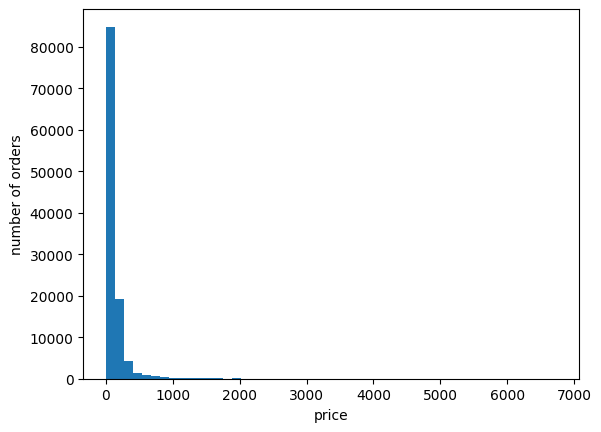

In [124]:
plt.hist(df.price, bins = 50)
plt.xlabel('price')
plt.ylabel('number of orders')
plt.show()

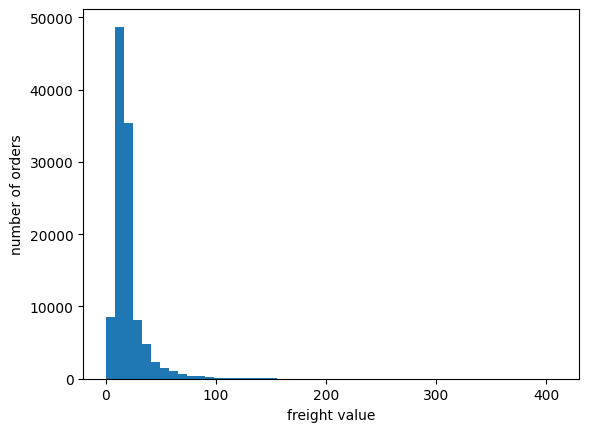

In [125]:
plt.hist(df.freight_value, bins = 50)
plt.xlabel('freight value')
plt.ylabel('number of orders')
plt.show()

### Distributions are OK

## Point 3 detailed - impact of delay in delivery on review_score

In [127]:
df = pd.read_sql('''
SELECT orev.review_score, order_delivered_customer_date::date - order_estimated_delivery_date::date AS days_of_delay
FROM orders o
JOIN order_reviews orev
ON orev.order_id = o.order_id
''', engine)

df.head()

,review_score,days_of_delay
0,4,-16.0
1,5,-5.0
2,5,-21.0
3,5,-20.0
4,5,-9.0


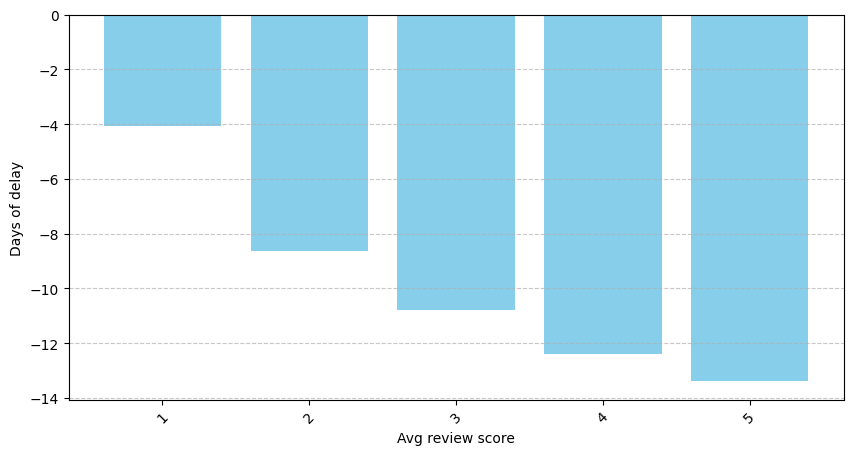

In [133]:
# For all dataset
grouped = df.groupby('review_score')['days_of_delay'].mean()

plt.figure(figsize=(10, 5))
plt.bar(grouped.index, grouped.values, color='skyblue')

plt.ylabel('Days of delay')
plt.xlabel('Avg review score')
plt.xticks(rotation=45)  # Если нужно повернуть подписи оси X для читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

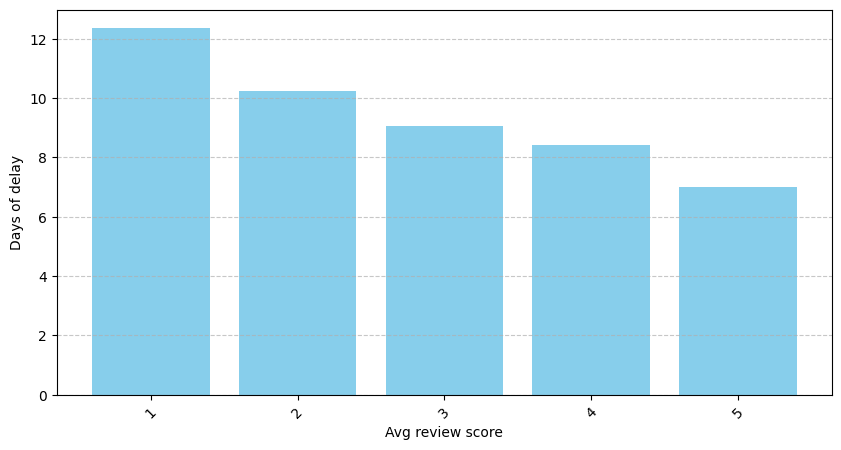

In [135]:
# For delayed orders
grouped = df[df.days_of_delay > 0].groupby('review_score')['days_of_delay'].mean()

plt.figure(figsize=(10, 5))
plt.bar(grouped.index, grouped.values, color='skyblue')

plt.ylabel('Days of delay')
plt.xlabel('Avg review score')
plt.xticks(rotation=45)  # Если нужно повернуть подписи оси X для читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

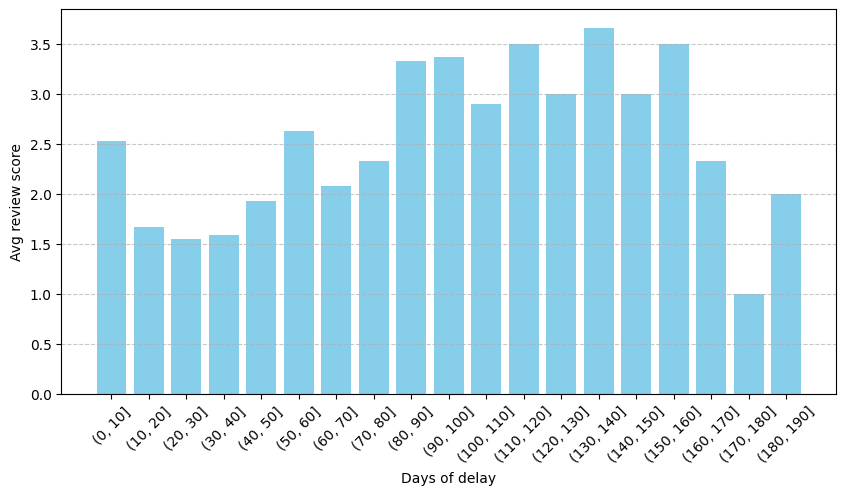

In [144]:
# For delayed orders
df['delay_group'] = pd.cut(df['days_of_delay'], bins=range(0, 200, 10))

grouped = df[df.days_of_delay > 0].groupby('delay_group', observed=False)['review_score'].mean()

plt.figure(figsize=(10, 5))
plt.bar(grouped.index.astype(str), grouped.values, color='skyblue')

plt.xlabel('Days of delay')
plt.ylabel('Avg review score')
plt.xticks(rotation=45)  # Если нужно повернуть подписи оси X для читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

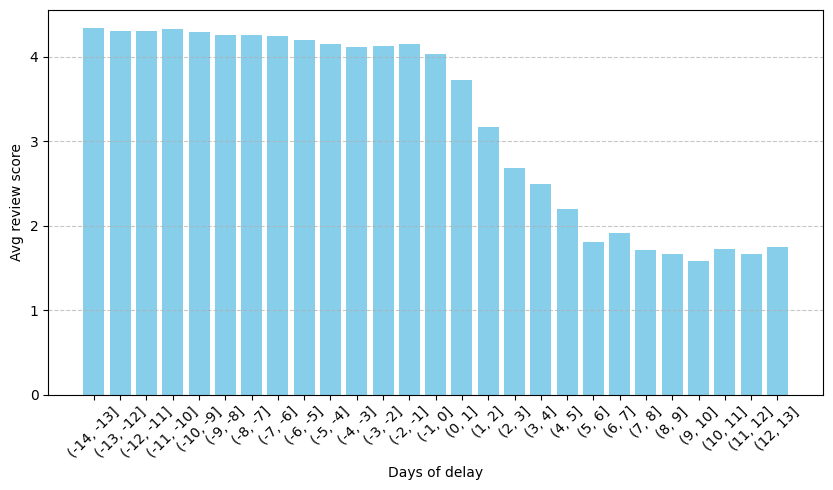

In [146]:
# For all dataset
df['delay_group'] = pd.cut(df['days_of_delay'], bins=range(-14, 14, 1))

grouped = df.groupby('delay_group', observed=False)['review_score'].mean()

plt.figure(figsize=(10, 5))
plt.bar(grouped.index.astype(str), grouped.values, color='skyblue')

plt.xlabel('Days of delay')
plt.ylabel('Avg review score')
plt.xticks(rotation=45)  # Если нужно повернуть подписи оси X для читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## There is a significant corellation between review scores and delays of delivery. Let's check the dependence of review scores on total delivery time

In [147]:
df = pd.read_sql('''
SELECT orev.review_score, order_delivered_customer_date::date - order_purchase_timestamp::date AS days_of_delivery
FROM orders o
JOIN order_reviews orev
ON orev.order_id = o.order_id
''', engine)

df.head()

,review_score,days_of_delivery
0,4,6.0
1,5,9.0
2,5,13.0
3,5,11.0
4,5,18.0


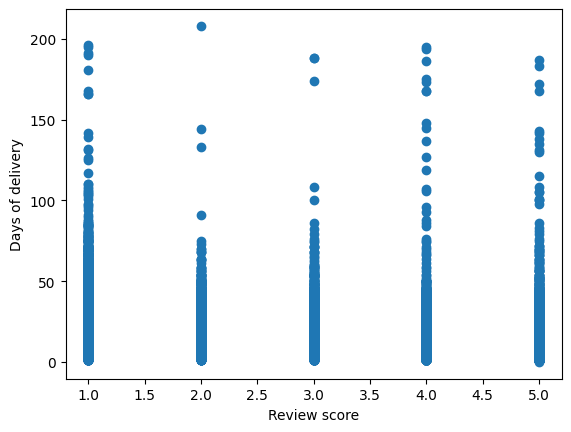

In [148]:
plt.scatter(df['review_score'], df['days_of_delivery'])
plt.xlabel('Review score')
plt.ylabel('Days of delivery')
plt.show()

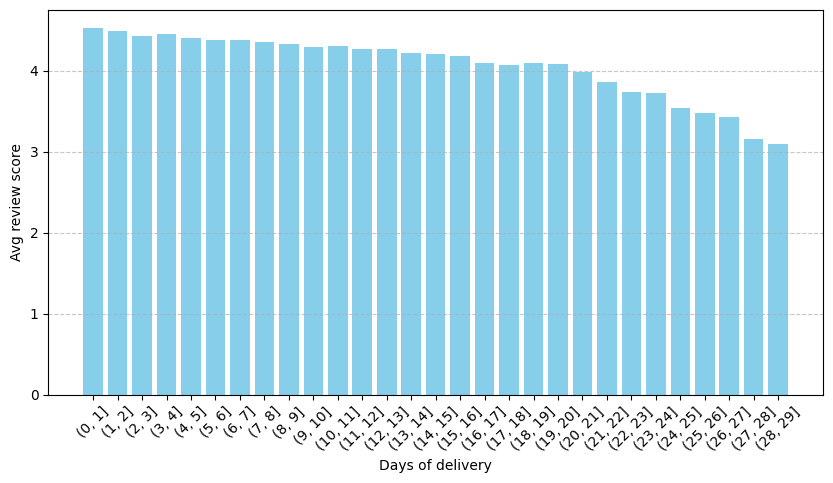

In [149]:
# For all dataset
df['delivery_group'] = pd.cut(df['days_of_delivery'], bins=range(0, 30, 1))

grouped = df.groupby('delivery_group', observed=False)['review_score'].mean()

plt.figure(figsize=(10, 5))
plt.bar(grouped.index.astype(str), grouped.values, color='skyblue')

plt.xlabel('Days of delivery')
plt.ylabel('Avg review score')
plt.xticks(rotation=45)  # Если нужно повернуть подписи оси X для читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Dependence on delay is much stronger, hence it makes sense to improve estimation of delivery date to meet customers expectations and get higher scores